In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import SBNDstyle
plt.style.use('SBND.mplstyle')


# #define the color cycle
# c1 = '#0072B2'
# c2 = '#009E73'
# c3 = '#D55E00'
# c4 = '#CC79A7'
# c5 = '#F0E442'
# c6 = '#56B4E9'
# c7 = '#E69F00'
# c8 = '#0072B2'
# c9 = '#009E73'
# c10 = '#D55E00'
# c11 = '#CC79A7'

#ATLAS color cycle
c1 = '#444444'
c2 = '#e4e4e4'
c3 = '#af0000'
c4 = '#008700'
c5 = '#005f87'
c6 = '#afaf00'
c7 = '#d75f00'
c8 = '#d70087'
c9 = '#8700af'
c10 = '#0087af'
c11 = '#5f7800'

my_cycle = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10,c11]

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=my_cycle)

# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)



In [3]:
folder_path = "experiments_data/"  # Replace with the actual folder path

# Get a list of all files in the folder ending with .dat
file_list = [file for file in os.listdir(folder_path) if file.endswith(".dat")]

skip_files_with_keys=["K_to"]

file_list = [file for file in file_list if not any(key in file for key in skip_files_with_keys)]


# Iterate over each file and open it in a pandas dataframe
dataframes = {}
for file in file_list:

    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        lines = f.readlines()
        
    factor = 1
    if 'GeV' in lines[0]:factor = 1000;
    # Check if the first line contains the word 'GeV'
        
    # Check if the first line contains letters
    if any(c.isalpha() for c in lines[0]):
        lines = lines[1:]  # Skip the first line
        
    # Skip lines starting with '#'
    lines = [line for line in lines if not line.startswith('#')]

    # Create a pandas dataframe from the remaining lines
    df = pd.DataFrame([line.split() for line in lines], columns=['mass', 'coupling'])
    
    # Check if the first line contains the word 'GeV'
    df['mass'] = df['mass'].astype(float) * factor
    df['coupling'] = df['coupling'].astype(float)
    df = df.dropna()  # Remove rows containing NaN values
    df = df.reset_index(drop=True)
    
    if sum(df['mass']>2)<1:
        df['mass'] = df['mass']*1000

    dataframes[file] = df

In [4]:
# combine_exp=["PIENU","NuTeV","PS191"]
combine_exp=["PIENU","NuTeV"]

for exp in combine_exp:
    # Get the keys that contain "PIENU"
    exp_keys = [key for key in dataframes.keys() if exp in key]

    # Merge the dataframes into a single dataframe
    combined_df = pd.concat([dataframes.pop(key) for key in exp_keys])
    combined_df.reset_index(drop=True)


    # Add the combined dataframe with the key "PIENU"
    dataframes[exp] = combined_df
    

# Get the keys that contain "PSI_1987" and "SIN"
keys_to_combine = [key for key in dataframes.keys() if "PSI_1987" in key or "SIN" in key]

# Merge the dataframes into a single dataframe
combined_df = pd.concat([dataframes.pop(key) for key in keys_to_combine])
combined_df.reset_index(drop=True)

# Add the combined dataframe with the key "SIN"
dataframes["SIN"] = combined_df

#For each dataframe, check if masses entries are repeated, if so, take the min coupling and remove the rest
for key, df in dataframes.items():
    df = df.groupby('mass').min().reset_index()
    dataframes[key] = df


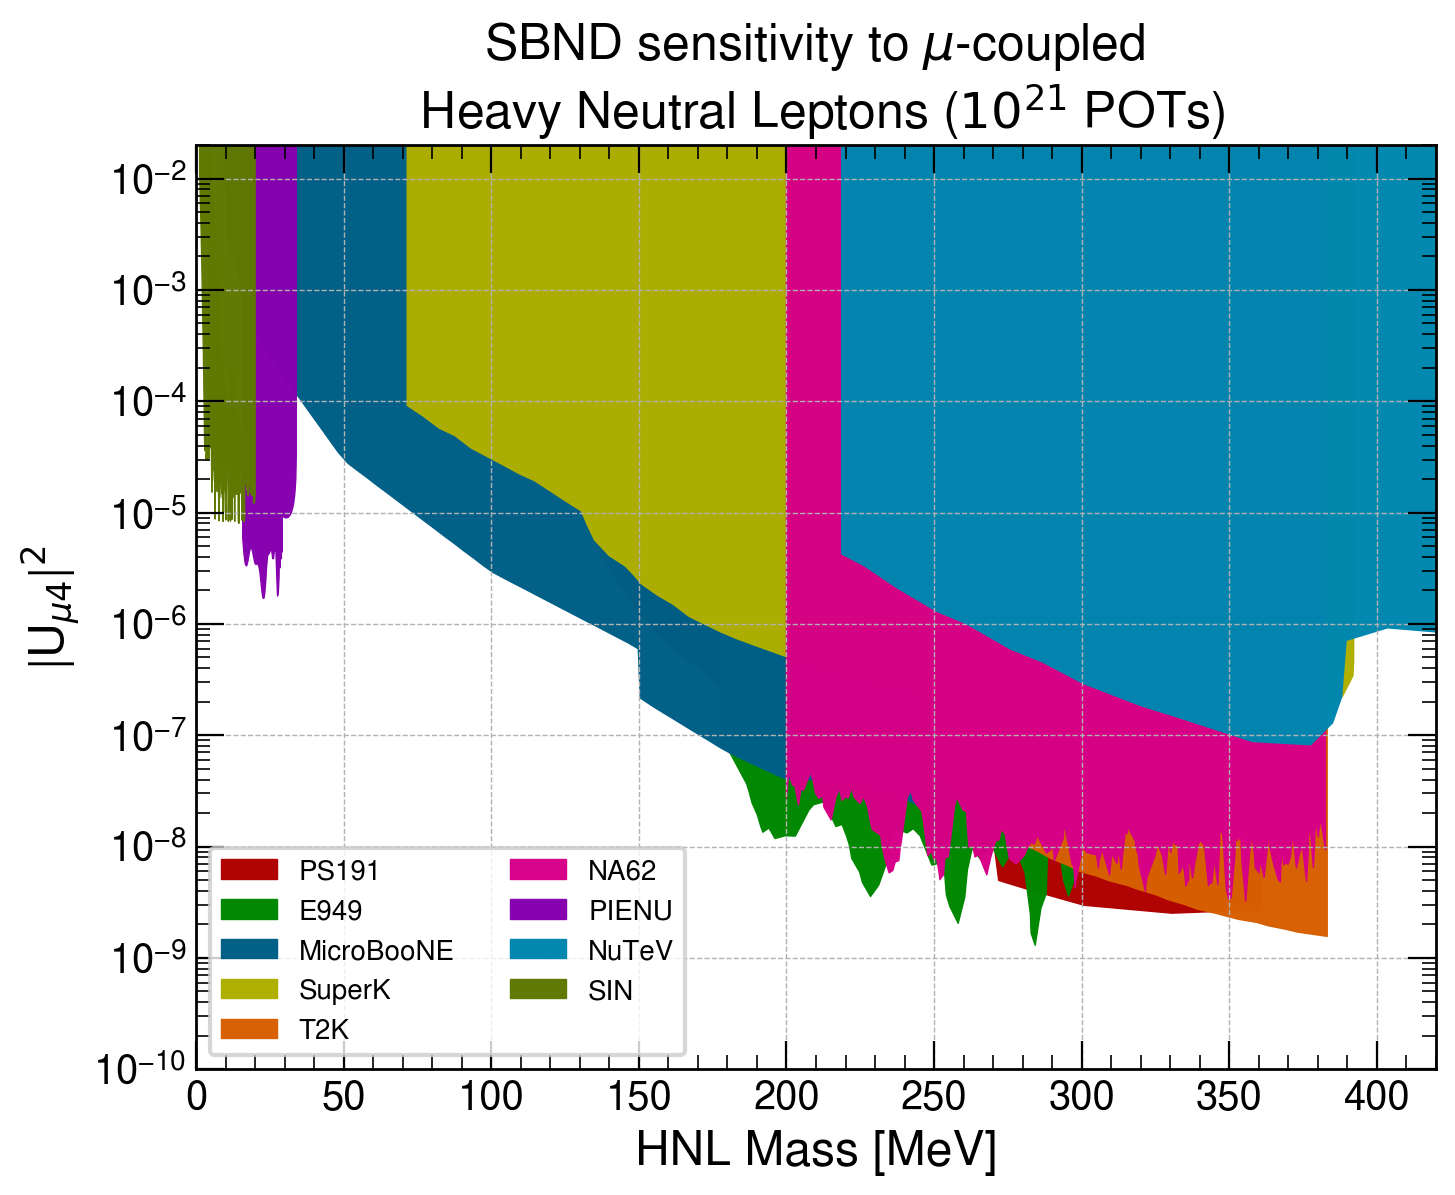

In [10]:
# %matplotlib widget

# Create a figure and axis
fig, ax = plt.subplots(dpi=200, figsize=(8, 6))


skip_exp=[]
# skip_exp=["SIN","PIENU"]

i=0;
for key in dataframes:
    if any(exp in key for exp in skip_exp):continue
    # print(f"Dataframe {i+1}:")
    # print(df)
    df = dataframes[key];
    # Add first and last rows
    mass=df["mass"].values
    coupling=df["coupling"].values

    label=key.split(".dat")[0]
    if "_" in label:
        label = label.split("_")[0]  # Keep only the string before a lowercase "_" if present
    sorted_indices = np.argsort(mass)
    mass = mass[sorted_indices]
    coupling = coupling[sorted_indices]

    mass =np.concatenate([[mass[0]],mass,[mass[-1]]])
    coupling =np.concatenate([[1],coupling,[1]])
    
    
    # ax.plot(mass, coupling, label=key,linewidth=1)
    ax.fill_between(mass, coupling, 1, alpha=0.99,edgecolor='C'+str(i+2),label=label,facecolor='C'+str(i+2),linewidth=0.5)
    # ax.fill_between(mass, coupling, 1, alpha=0.9,label=label,facecolor='C'+str(i+2))

    i+=1;
    
plt.semilogy()

# Show the plot
plt.ylim(1e-10, 2e-2)
plt.xlim(0,250)
plt.xlim(0,420)
plt.grid()
plt.xlabel("HNL Mass [MeV]")
plt.ylabel(r"|U$_{\mu4} $|$^2$")
plt.title("SBND sensitivity to $\mu$-coupled \n Heavy Neutral Leptons ($10^{21}$ POTs)",fontsize=18)

plt.legend(loc='lower left',fontsize=10,frameon=True,ncol=2)



## Aquí van tus puntos: (la masa en MeVs y el valor de |U|^2 que corresponda)
